https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

https://spam-classification-ml.streamlit.app/

In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [30]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
156,ham,I'm leaving my house now...,NaN,NaN,NaN
2738,ham,I sent you the prices and do you mean the &lt...,NaN,NaN,NaN
3809,ham,"Aight, can you text me the address?",NaN,NaN,NaN
3135,ham,Can you let me know details of fri when u find...,NaN,NaN,NaN
5405,ham,So how many days since then?,NaN,NaN,NaN


In [31]:
df.shape

(5572, 5)

In [32]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [34]:
# Drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [35]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
# Rename columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [37]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
# Covert target column to labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
df['target'] = le.fit_transform(df['target'])
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [40]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
# Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [42]:
# check for duplicate rows
df.duplicated().sum()

np.int64(403)

In [43]:
# Remove duplicate rows
df.drop_duplicates(keep='first', inplace=True)  # keep = 'first' means keep the first occurrence of the duplicate

In [44]:
df.shape

(5169, 2)

### 2. EDA

In [45]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

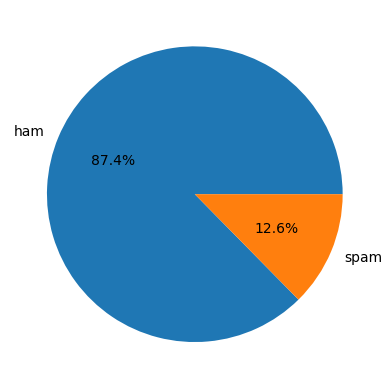

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()  # For displaying the pie chart in Jupyter Notebook

*Data is imbalanced*

In [48]:
import nltk
# nltk.download('punkt')  # Download the punkt tokenizer, it is used for tokenization

In [49]:
df['num_characters'] = df['text'].apply(len)

In [50]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [51]:
# No of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [52]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [53]:
# No of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [55]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [56]:
# 1 for spam, 0 for ham
df[df['target'] == 1][['text', 'num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Text(0.5, 1.0, 'Spam Messages Character Count')

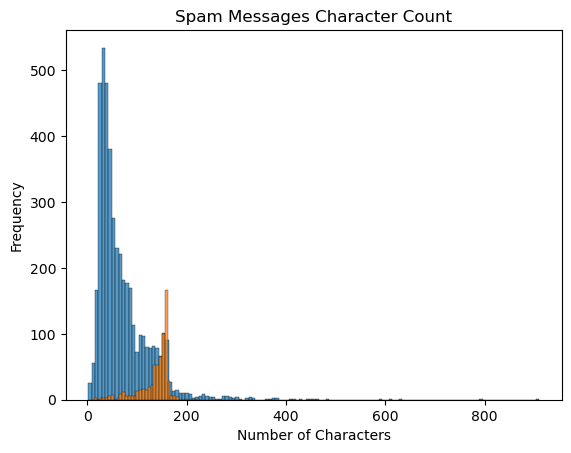

In [57]:
# Histogram 
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'])
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Spam Messages Character Count')

Text(0.5, 1.0, 'Spam Messages Words Count')

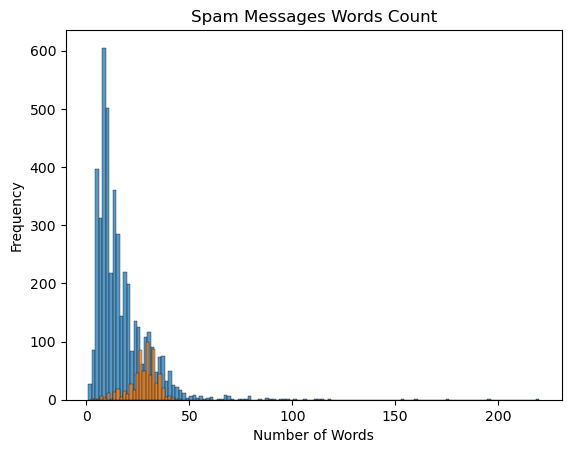

In [58]:
# Histogram 
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Spam Messages Words Count')

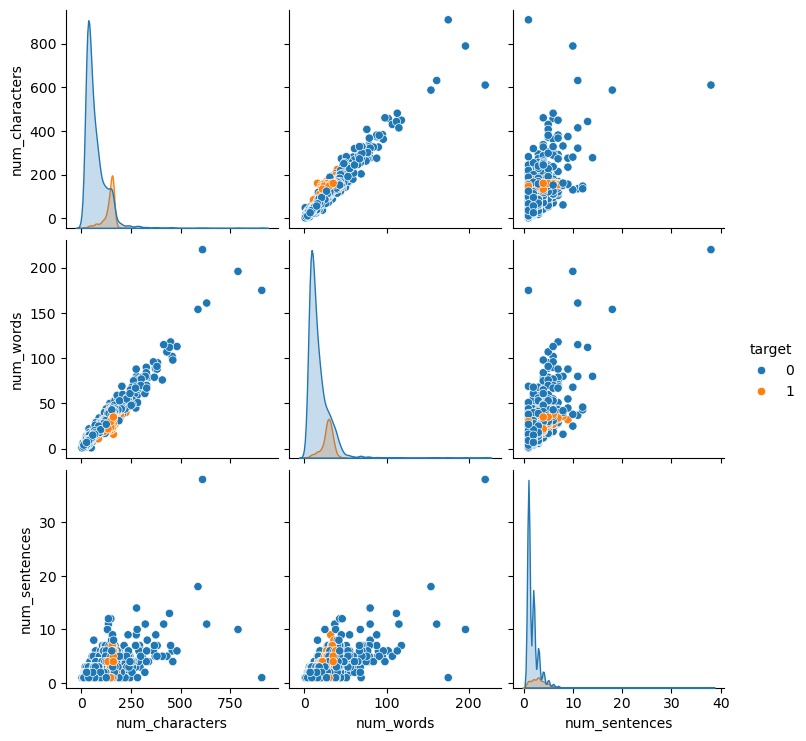

In [59]:
sns.pairplot(df, hue='target', vars=['num_characters', 'num_words', 'num_sentences'])

<Axes: >

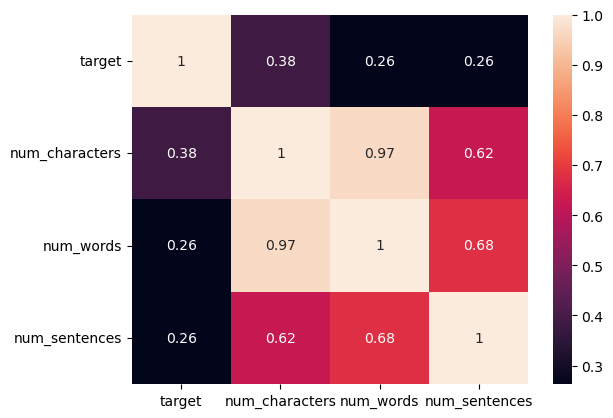

In [61]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [62]:
from nltk.corpus import stopwords
# stopwords.words('english')
import string
string.punctuation
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [64]:
def transform_text(text):
    text = text.lower()  # Lowercase
    text = nltk.word_tokenize(text)  # Tokenization
    y = [word for word in text if word.isalnum()]  # Remove special characters
    text = y[:]     # Copy to y to avoid modifying original text
    y.clear()   # Clear the list
    y = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]  # Remove stopwords
    
    text = y[:]     # Copy to y to avoid modifying original text
    y.clear()   # Clear the list
    
    y = [ps.stem(word) for word in text]  # Stemming
    return ' '.join(y)

In [65]:
transform_text('I loved programming program! #Python3. Did you known that person?')
transform_text('I loved the YT lectures on Machine learning. How about you?')

'love yt lectur machin learn'

In [67]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [68]:
df['transform_text'] = df['text'].apply(transform_text)

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [70]:
# !pip install wordcloud

In [71]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, background_color='white')

In [72]:
spam_wc = wc.generate(" ".join(df[df['target'] == 1]['transform_text']))

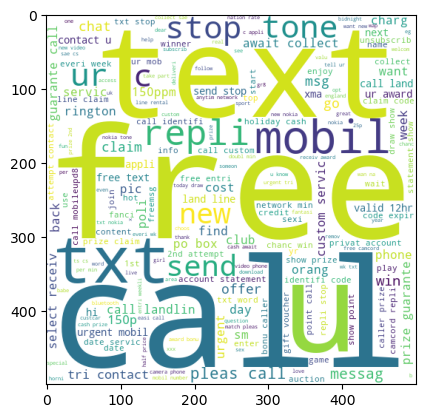

In [73]:
plt.imshow(spam_wc)

In [74]:
ham_wc = wc.generate(" ".join(df[df['target'] == 0]['transform_text']))

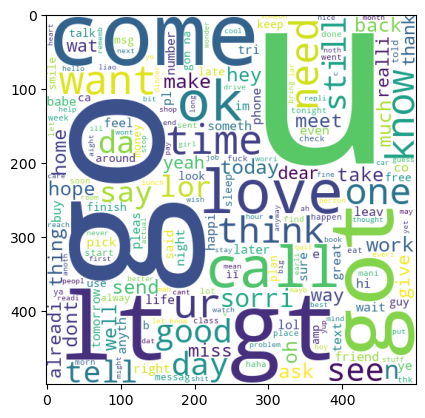

In [75]:
plt.imshow(ham_wc)

In [76]:
# Top 30 words spam
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [77]:
len(spam_corpus)

9939

<Axes: xlabel='count', ylabel='word'>

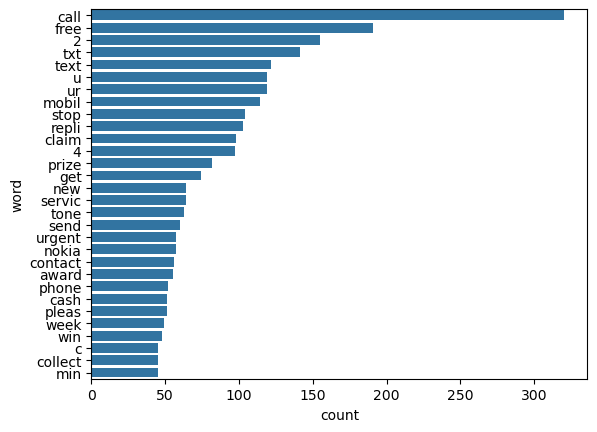

In [78]:
from collections import Counter
spam_freq = Counter(spam_corpus)
top_spam = pd.DataFrame(spam_freq.most_common(30), columns=['word', 'count'])
sns.barplot(x='count', y='word', data=top_spam)

In [79]:
# Top 30 words ham
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [80]:
len(ham_corpus)

35404

<Axes: xlabel='count', ylabel='word'>

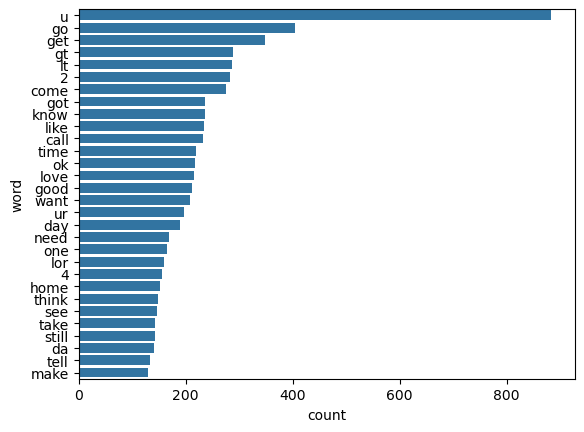

In [81]:
from collections import Counter
ham_freq = Counter(ham_corpus)
top_ham = pd.DataFrame(ham_freq.most_common(30), columns=['word', 'count'])
sns.barplot(x='count', y='word', data=top_ham)

## 4. Model Building

In [83]:
from sklearn.feature_extraction.text import CountVectorizer # CountVectorizer is used to convert a collection of text documents to a matrix of token counts
cv = CountVectorizer()

In [84]:
X = cv.fit_transform(df['transform_text']).toarray()  # Convert text to numerical data
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 6708))

In [85]:
X.shape

(5169, 6708)

In [86]:
y = df['target'].values  # Target variable
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 6708), (1034, 6708), (4135,), (1034,))

In [89]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score ,classification_report

In [90]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [91]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gnb)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_gnb))
print("Precision Score:", precision_score(y_test, y_pred_gnb))
print("Classification Report:", classification_report(y_test, y_pred_gnb))


Accuracy: 86.85%
Confusion Matrix: [[772 117]
 [ 19 126]]
Precision Score: 0.5185185185185185
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.87      0.92       889
           1       0.52      0.87      0.65       145

    accuracy                           0.87      1034
   macro avg       0.75      0.87      0.78      1034
weighted avg       0.91      0.87      0.88      1034



In [92]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_mnb)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_mnb))
print("Precision Score:", precision_score(y_test, y_pred_mnb))
print("Classification Report:", classification_report(y_test, y_pred_mnb))

Accuracy: 97.39%
Confusion Matrix: [[872  17]
 [ 10 135]]
Precision Score: 0.8881578947368421
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.89      0.93      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.97      0.97      0.97      1034



In [93]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bnb)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_bnb))
print("Precision Score:", precision_score(y_test, y_pred_bnb))
print("Classification Report:", classification_report(y_test, y_pred_bnb))

Accuracy: 96.62%
Confusion Matrix: [[885   4]
 [ 31 114]]
Precision Score: 0.9661016949152542
Classification Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034



### Using TFIDF:

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [95]:
X = tfidf.fit_transform(df['transform_text']).toarray()  # Convert text to numerical data
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 6708))

In [96]:
y = df['target'].values  # Target variable
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score ,classification_report

In [99]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [100]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gnb)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_gnb))
print("Precision Score:", precision_score(y_test, y_pred_gnb))
print("Classification Report:", classification_report(y_test, y_pred_gnb))


Accuracy: 86.36%
Confusion Matrix: [[772 117]
 [ 24 121]]
Precision Score: 0.5084033613445378
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.87      0.92       889
           1       0.51      0.83      0.63       145

    accuracy                           0.86      1034
   macro avg       0.74      0.85      0.77      1034
weighted avg       0.91      0.86      0.88      1034



In [101]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_mnb)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_mnb))
print("Precision Score:", precision_score(y_test, y_pred_mnb))
print("Classification Report:", classification_report(y_test, y_pred_mnb))

Accuracy: 96.13%
Confusion Matrix: [[888   1]
 [ 39 106]]
Precision Score: 0.9906542056074766
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.99      0.73      0.84       145

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



In [102]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bnb)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_bnb))
print("Precision Score:", precision_score(y_test, y_pred_bnb))
print("Classification Report:", classification_report(y_test, y_pred_bnb))

Accuracy: 96.62%
Confusion Matrix: [[885   4]
 [ 31 114]]
Precision Score: 0.9661016949152542
Classification Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034



In [103]:
# Best Model
# Multinomial Naive Bayes with TFIDF

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [106]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [107]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [108]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [109]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.971953578336557, 0.9393939393939394)

In [110]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.9393939393939394
For  KN
Accuracy -  0.8965183752417795
Precision -  1.0
For  NB
Accuracy -  0.9613152804642167
Precision -  0.9906542056074766
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8095238095238095
For  LR
Accuracy -  0.9439071566731141
Precision -  0.865546218487395
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9913793103448276
For  AdaBoost
Accuracy -  0.9148936170212766
Precision -  0.7878787878787878
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8776978417266187
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.9916666666666667
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9519230769230769
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9612403100775194


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
8,ETC,0.973888,0.991667
5,RF,0.970019,0.991379
2,NB,0.961315,0.990654
10,xgb,0.974855,0.961240
9,GBDT,0.950677,0.951923
0,SVC,0.971954,0.939394
7,BgC,0.961315,0.877698
4,LR,0.943907,0.865546
3,DT,0.935203,0.809524


In [113]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,ETC,Accuracy,0.973888
2,RF,Accuracy,0.970019
3,NB,Accuracy,0.961315
4,xgb,Accuracy,0.974855
5,GBDT,Accuracy,0.950677
6,SVC,Accuracy,0.971954
7,BgC,Accuracy,0.961315
8,LR,Accuracy,0.943907
9,DT,Accuracy,0.935203


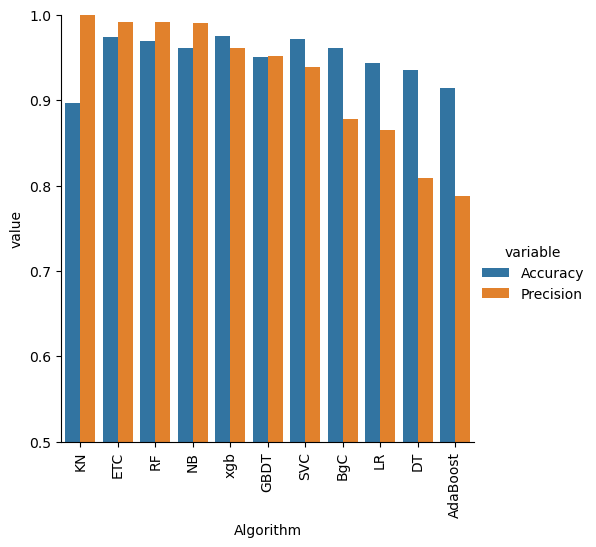

In [119]:
sns.catplot(x='Algorithm', y='value',
            hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Improve

In [ ]:
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.928433,0.771186
1,NB,0.959381,1.000000,0.971954,1.000000,0.978723,0.946154,0.940039,1.000000
2,ETC,0.977756,0.991453,0.979691,0.975610,0.979691,0.975610,0.976789,0.975000
3,RF,0.970019,0.990826,0.975822,0.982906,0.975822,0.982906,0.974855,0.982759
4,SVC,0.972921,0.974138,0.974855,0.974576,0.971954,0.943089,0.866538,0.000000
5,AdaBoost,0.962282,0.954128,0.961315,0.945455,0.961315,0.945455,0.971954,0.950413
6,xgb,0.971954,0.950413,0.968085,0.933884,0.968085,0.933884,0.970019,0.942149
7,LR,0.951644,0.940000,0.956480,0.969697,0.967118,0.964286,0.961315,0.971154
8,GBDT,0.951644,0.931373,0.946809,0.927835,0.946809,0.927835,0.948743,0.929293
9,BgC,0.957447,0.861538,0.959381,0.869231,0.959381,0.869231,0.968085,0.913386


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9328358208955224


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))